In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\sales-cars.csv', parse_dates=['Month'], index_col="Month")
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


<AxesSubplot:xlabel='Month'>

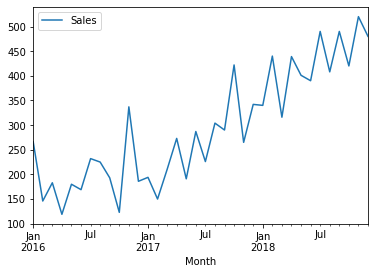

In [10]:
df.plot()

Check for Stationality

In [12]:
import statsmodels.api as sm

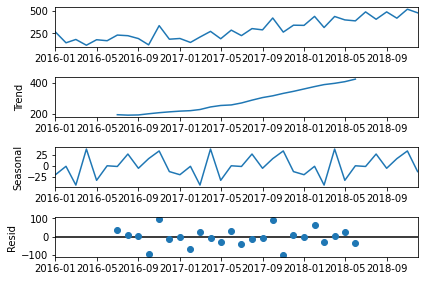

In [13]:
decomposition = sm.tsa.seasonal_decompose(df,model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adftest = adfuller(df)

In [16]:
print("p-Value of adfuller test is : ",adftest[0])

# P Value > 0.5 says that the series is not stationary

p-Value of adfuller test is :  1.6368831572690323


Train-Test Split

In [40]:
X = df.values
print("No if datapoints:",len(X))
train = df[0:27]
test = df[27:]
predictions = []

No if datapoints: 36


What we aim to do?

1. We have to use train test and predict the test set.
2. then we'll use the entire dataset to predict the unseen future

**ARIMA Model Building**


Types of ARIMA Models

![arima](images/arima.jpg)

ARIMA Models -> AR + I + MA

![arima](images/arima_part.jpg)

1. <u>**P = ORDER OF AR :**</u> p = 3 means that the Sales of Dec, Sales<sub>Dec</sub> depends on past 3 period i.e. Sales<sub>Nov</sub> , Sales<sub>Oct</sub> & Sales<sub>Sep</sub><br/>
the Sales of Nov, Sales<sub>Nov</sub> depends on past 3 period i.e. Sales<sub>Oct</sub> , Sales<sub>Sep</sub> & Sales<sub>Aug</sub><br/>

    P values can be found using PACF plots.

2. <u>**Moving Average :**</u> The y<sub>t</sub> has the effects of the previous error terms in it.

    y<sub>t</sub> = a + E<sub>t</sub> + b<sub>1</sub>E<sub>t-1</sub> + b<sub>2</sub>E<sub>t-2</sub>

    **Q = ORDER OF MA**

    Q values can be found using ACF plots.

3. <u>**Integrated ~~ Differenced :**</u> We take the difference of the value with it's previous values.

    DIFF<SUB>t</SUB> = Y<sub>t</sub> - Y<sub>t-1<sub> 

    **D = ORDER OF Difference** : This removes the effect of <u>**trends**</u> and <u>**seasonality**</u> form the series. The value D describes how many times we take the difference of the series.


In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [48]:
model = ARIMA(train, order=(3,1,0)).fit()

**Prediction**

In [49]:
pred = model.predict(start=len(train), end=(len(df)-1))

**Model Evaluation**

In [29]:
from sklearn.metrics import mean_squared_error

In [44]:
error = np.sqrt(mean_squared_error(test, pred))
error

441.51752232099363

Let's check if this error value is good or not.
Mean of test dataset and what it's first standard deviation

In [43]:
(test.mean(), np.sqrt(test.var()))

(Sales    448.666667
 dtype: float64,
 Sales    47.130139
 dtype: float64)

<AxesSubplot:xlabel='Month'>

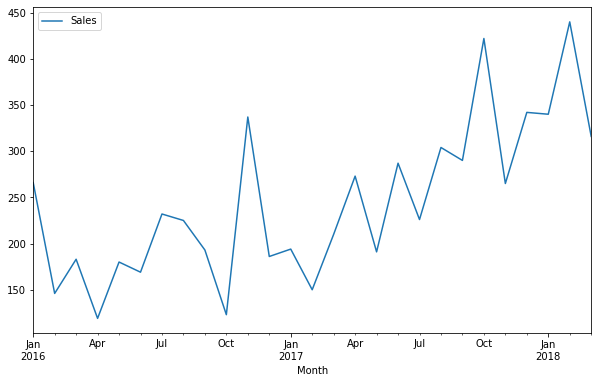

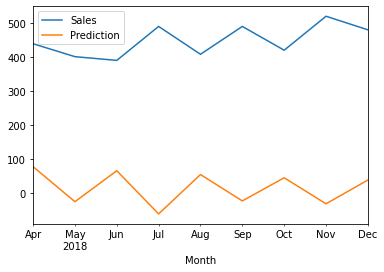

In [50]:
train.plot(legend=True, label="Train", figsize=(10,6))
test.plot(legend=True, label="Test")
pred.plot(legend=True, label="Prediction")

<AxesSubplot:xlabel='Month'>

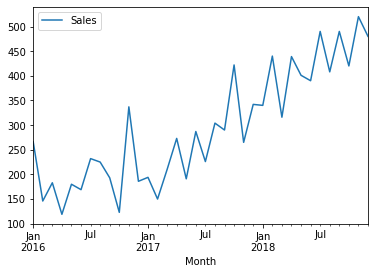

In [51]:
df.plot()

Predicting the Future

In [52]:
final_model = ARIMA(df, order=(3,1,0)).fit()
prediction_future = final_model.predict(len(df), len(df) + 6)

<AxesSubplot:xlabel='Month'>

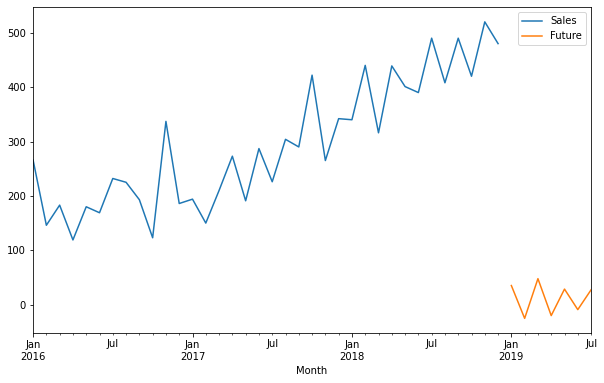

In [53]:
df.plot(legend="True", label="Data",figsize=(10,6))
prediction_future.plot(legend="True", label="Future")

Getitng P,Q,D values using auto ARIMA

In [56]:
import pmdarima
from pmdarima import auto_arima

In [57]:
auto_arima(train, m=12, start_p=0, seasonal=True, d=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=311.829, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=294.242, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=309.841, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=298.791, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=296.034, Time=0.29 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=296.026, Time=0.22 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=298.026, Time=0.31 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=305.345, Time=0.11 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=294.213, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=300.164, Time=0.08 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=296.040, Time=0.53 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=29

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)